In [1]:
from dcel import DCEL, Vertex, hEdge, Face
import numpy as np
from numpy import dot, cross
from operator import add
from itertools import cycle, islice, permutations, combinations
from collections import deque


In [30]:
d = DCEL()

# create vertices
pts = np.random.randint(-10, 10, (10,3))

v0, v1, v2, v3 = tuple(d.createVertex(*pts[i]) for i in range(4))
 
if dot(cross(v1-v0, v2-v1), v0-v3) < 0:
    vertices = (v0, v1, v2)
    print("Expected Order")
else:
    vertices = (v0, v2, v1)
    print("Unexpected Order")

# create first triangle face and all edges + twins
face = d.createFace()
hedges = [d.createHedge() for _ in range(6)]
      
face.outerComponent = hedges[0]
# first three hedges belong to face
for h, v in zip(hedges[:3], vertices):
    h.incidentFace = face
    v.incidentEdge = h
    
for h, _h, v in zip(hedges, hedges[::-1], sum(permutations(vertices, 3), ())):
    h.origin = v
    h.twin = _h

#for i in range(3):
#    h, _h, h_ = tuple(dequ)

print(d)
#deqA, deqB = deque(hedges[:3]), deque(hedges[:3])

Expected Order
VERTEX 			incidentEdge
v0 (-4, 7, 4):		he0
v1 (-10, 6, 1):		he1
v2 (0, 8, 2):		he2
v3 (8, -2, 2):		None

hEDGE 	origin	twin	incidentFace	next	previous
he0:	0	he5	f0	None	None
he1:	1	he4	f0	None	None
he2:	2	he3	f0	None	None
he3:	0	he2	None	None	None
he4:	2	he1	None	None	None
he5:	1	he0	None	None	None
FACE 	outerComponent
f0:	he0



In [3]:
d.vertexDict.values()

dict_values([v0 (-10, 0, 4), v1 (-9, -7, -5), v2 (-4, -9, -10), v3 (2, -5, 9)])

In [31]:
deqA, deqB = deque(hedges[:3]), deque(hedges[3:])
for k_ in range(3):
    for deq in [deqA, deqB]:
        h, h_, _h = tuple(deq)
        h.next = h_
        h.previous = _h
        deq.rotate(1)

print(d)

VERTEX 			incidentEdge
v0 (-4, 7, 4):		he0
v1 (-10, 6, 1):		he1
v2 (0, 8, 2):		he2
v3 (8, -2, 2):		None

hEDGE 	origin	twin	incidentFace	next	previous
he0:	0	he5	f0	he1	he2
he1:	1	he4	f0	he2	he0
he2:	2	he3	f0	he0	he1
he3:	0	he2	None	he4	he5
he4:	2	he1	None	he5	he3
he5:	1	he0	None	he3	he4
FACE 	outerComponent
f0:	he0



In [5]:
class h():
    def __init__(self, i):
        self.i = i
        self.twin = None
        return
    
h0, h1 = tuple(h(i) for i in range(2))
h0.twin, h1.twin = h1, h0
print(h0.i, h0.twin.i, h1.i, h1.twin.i)

0 1 1 0


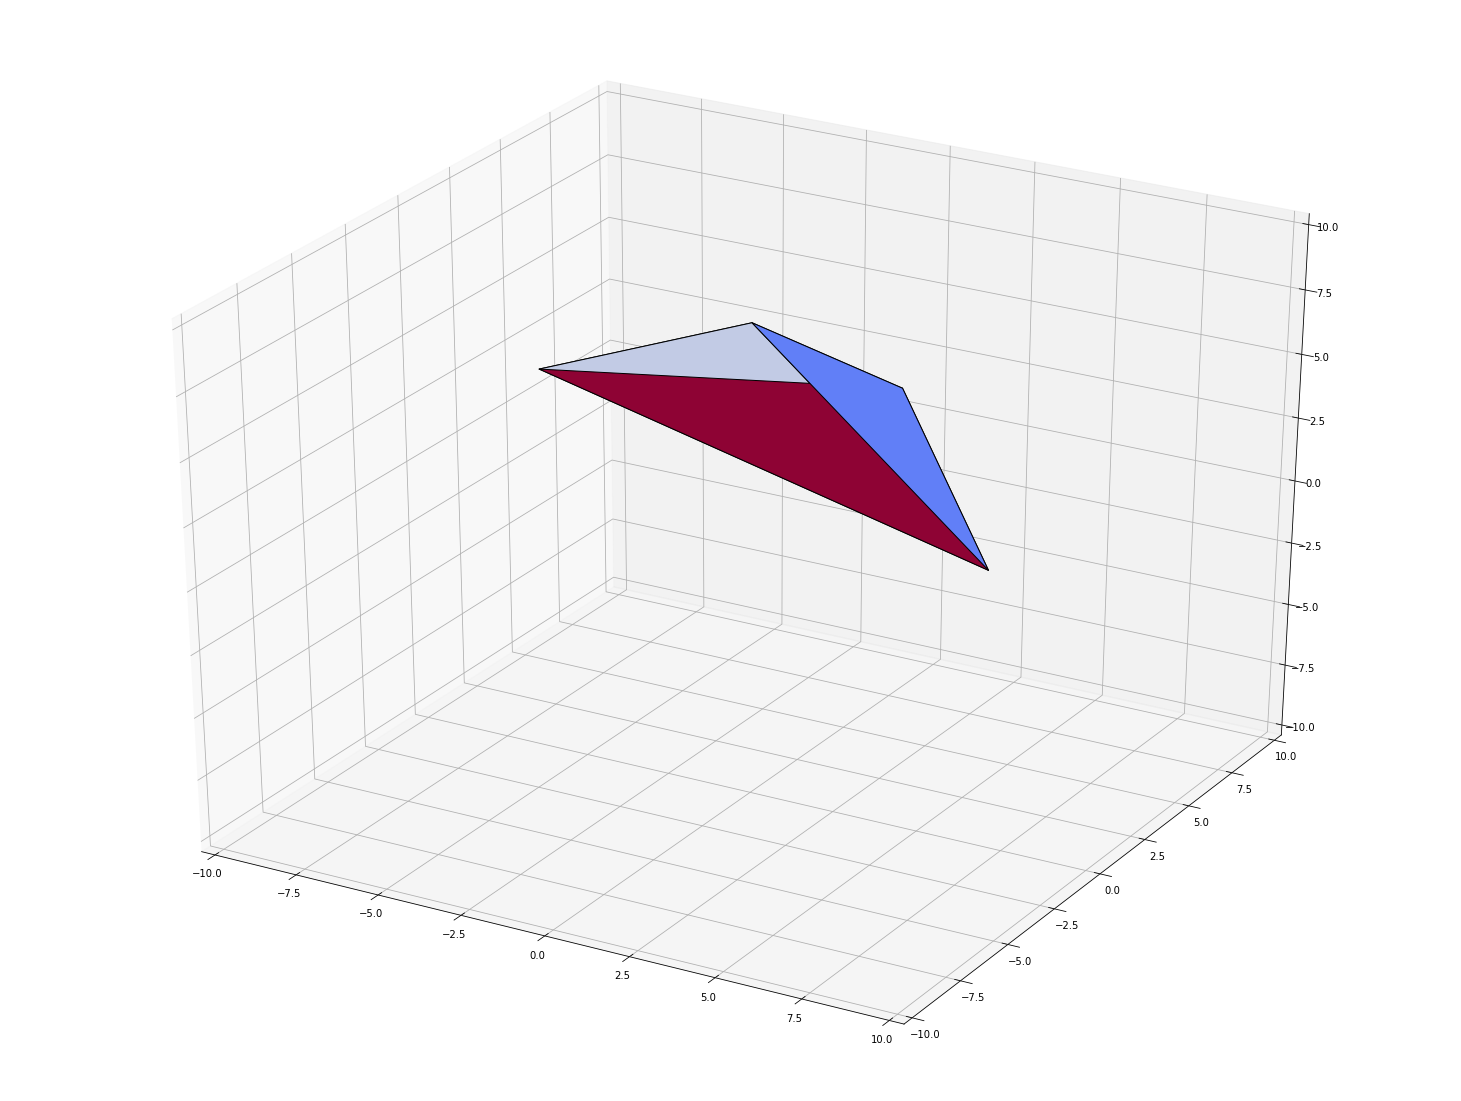

In [32]:
import mpl_toolkits.mplot3d as mpl_3D
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#import pylab as pl
import scipy as sp

ax = mpl_3D.Axes3D(plt.figure(figsize=[20,15]))
#for i in range(10):
#vtx = sp.rand(3,3)
tri0 = mpl_3D.art3d.Poly3DCollection([[list(v.p()) for v in [v0,v1,v2]]])
tri1 = mpl_3D.art3d.Poly3DCollection([[list(v.p()) for v in [v0,v1,v3]]])
tri2 = mpl_3D.art3d.Poly3DCollection([[list(v.p()) for v in [v1,v2,v3]]])
tri3 = mpl_3D.art3d.Poly3DCollection([[list(v.p()) for v in [v0,v2,v3]]])

for tri in [tri0, tri1, tri2, tri3]:
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    tri.set_alpha(0.2)
    ax.add_collection3d(tri)

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])

#plt.savefig('testfig.png', bbox_inches='tight')
plt.show()

(-10, 0, 4)
(-9, -7, -5)
(-4, -9, -10)


In [15]:
[sp.rand(3,3)]

[array([[ 0.66302804,  0.64678396,  0.11864645],
        [ 0.99830137,  0.5183926 ,  0.0434111 ],
        [ 0.69249427,  0.4358325 ,  0.4317999 ]])]